In [1]:
import numpy as np
import matplotlib.pyplot as plt

# HW3

In [9]:
def gaussian_function(x, xk, a, sigma):
    """
    This function computes the Gaussian function value
    Args:
        x (float): The x value 
        xk (float): The average value in the Gaussian function
        a (float): The prefactor 
        sigma (float): The sigma value in the Gaussian function
    Returns:
        gaussian_fun (float): The value of the Gaussian function at point x with
                              average of xk
    """
    pre_fact = (a/sigma)/(np.sqrt(2*np.pi))
    x_input = (-1/2)/(np.square(sigma))*np.square(x-xk)
    gaussian_fun = pre_fact*np.exp(x_input)

    return gaussian_fun


def Gx_k(x, xk, xk_b, xk_n):
    """
    Computes the value of Eq. 41 in the Topaler paper
    Args:
        x (float): The x value 
        xk (float): The grid point value
        xk_b (float): The grid point value before xk
        xk_n (float): The grid point value after xk
    Returns:
        gx_k_val (float): The value of the gx_k
    """
    val1 = gaussian_function(x, xk, 1, 0.1)
    val2 = (1+(x-xk)/(xk-xk_b))*(1-(x-xk)/(xk_n-xk))
    gx_k_val = np.exp(-val1/val2)
    return gx_k_val
    
def NaHF_Hamiltonian(thetas):
    """
    The main function to compute the Hamiltonian matrix of NaHF.
    Args:
        thetas (np.array): The list of theta values as is defined in the Topaler paper
    Returns:
        U11 (float): The first element of the Hamiltonian matrix
    """
    identity = np.identity(2)
    # R is the vector from Na to the center-of-mass of HF
    # r is the vector from H to F
    xks = 1+np.cos(thetas)
    # Yet to be defined
    Uii = 1.0
    nominator = 0
    denominator = 0
    for i in range(4):
        ia = (i+1)%4
        ib = (i-1)%4
        nominator += (4*Uii + Gx_k(xks[i], xks[i], xks[ib], xks[ia]))
        denominator += Gx_k(xks[i], xks[i], xks[ib], xks[ia])
    U11 = nominator/denominator
    
    return U11

### HW6: Writing the data into a file

In [45]:
thetas = np.array([np.pi, np.pi*2/3, np.pi/2, np.pi/3])
U11 = NaHF_Hamiltonian(thetas)
# Writing data into a file
f = open('file.txt','w')
f.write(F'{thetas[0]} {U11}\n')
f.close()

# HW 4: Finding the root of a function

In [26]:
def cosine_function(x):
    """
    This function computes the cosine of x values on an interval
    Args:
        x (np.array): The grid values
    Reurns:
        np.cos(x)
    """
    return np.cos(x)

def root_finder( f_function_name, f_function_parameters, precision):
    """
    This function computes the roots of a function
    Args:
        f_function_name (function PyObject): The name of a function
        f_function_parameters (function parameters): The parameters required to compute the 
                                                     value of the function
        precision (float): The precision of finding the root for a function
    Returns:
        roots (list): The function roots
    """
    roots = []
    x = f_function_parameters["grid"]
    vals = f_function_name(x)
    for i in range(vals.shape[0]):
        val = vals[i]
        if abs(val)<=precision:
            roots.append(x[i])
    return np.array(roots)

In [31]:
params = {}
params["grid"] = np.linspace(0,np.pi*2,10000)
roots = root_finder(cosine_function, params, 1e-3)
print(roots/np.pi)

[0.49984998 0.50005001 0.50025003 1.49974997 1.49994999 1.50015002]


# HW 5: Object oriented way of computing NaFH Hamiltonian

In [42]:
class compute_NaFH_Hamiltonian():
    def __init__(self):
        self.x = 1.0
        self.xk = self.x
        self.xk_b = self.x-0.1
        self.xk_n = self.x+0.1
        self.a = 1.0
        self.sigma = 0.01
        self.thetas = np.array([np.pi, np.pi*2/3, np.pi/2, np.pi/3])
        self.filename = 'filename.txt'
    
    def gaussian_function(self):
        """
        This function computes the Gaussian function value
        Args:
            x (float): The x value 
            xk (float): The average value in the Gaussian function
            a (float): The prefactor 
            sigma (float): The sigma value in the Gaussian function
        Returns:
            gaussian_fun (float): The value of the Gaussian function at point x with
                                  average of xk
        """
        a = self.a
        sigma = self.sigma
        x  = self.x
        xk = self.xk
        
        pre_fact = (a/sigma)/(np.sqrt(2*np.pi))
        x_input = (-1/2)/(np.square(sigma))*np.square(x-xk)
        gaussian_fun = pre_fact*np.exp(x_input)

        return gaussian_fun


    def Gx_k(self):
        """
        Computes the value of Eq. 41 in the Topaler paper
        Args:
            x (float): The x value 
            xk (float): The grid point value
            xk_b (float): The grid point value before xk
            xk_n (float): The grid point value after xk
        Returns:
            gx_k_val (float): The value of the gx_k
        """
        x = self.x
        xk = self.xk
        xk_b = self.xk_b
        xk_n = self.xk_n
        
        val1 = gaussian_function(x, xk, 1, 0.1)
        val2 = (1+(x-xk)/(xk-xk_b))*(1-(x-xk)/(xk_n-xk))
        gx_k_val = np.exp(-val1/val2)
        return gx_k_val

    def NaHF_Hamiltonian(self):
        """
        The main function to compute the Hamiltonian matrix of NaHF.
        Args:
            thetas (np.array): The list of theta values as is defined in the Topaler paper
        Returns:
            U11 (float): The first element of the Hamiltonian matrix
        """
        thetas = self.thetas
        identity = np.identity(2)
        # R is the vector from Na to the center-of-mass of HF
        # r is the vector from H to F
        xks = 1+np.cos(thetas)
        # Yet to be defined
        Uii = 1.0
        nominator = 0
        denominator = 0
        for i in range(4):
            ia = (i+1)%4
            ib = (i-1)%4
            nominator += (4*Uii + Gx_k(xks[i], xks[i], xks[ib], xks[ia]))
            denominator += Gx_k(xks[i], xks[i], xks[ib], xks[ia])
        self.U11 = nominator/denominator

        return self.U11
    # HW 6: writing data into a file
    def write_data(self):
        """
        This function writes the data into the file self.filename
        """
        f = open(self.filename,'w')
        f.write(F'{self.x} {self.U11}\n')
        f.close()

In [44]:
tmp = compute_NaFH_Hamiltonian()
print(tmp.NaHF_Hamiltonian())
tmp.write_data()

217.0947924031273


# HW 7: Plotting data

[217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924031273, 217.0947924

<IPython.core.display.Javascript object>


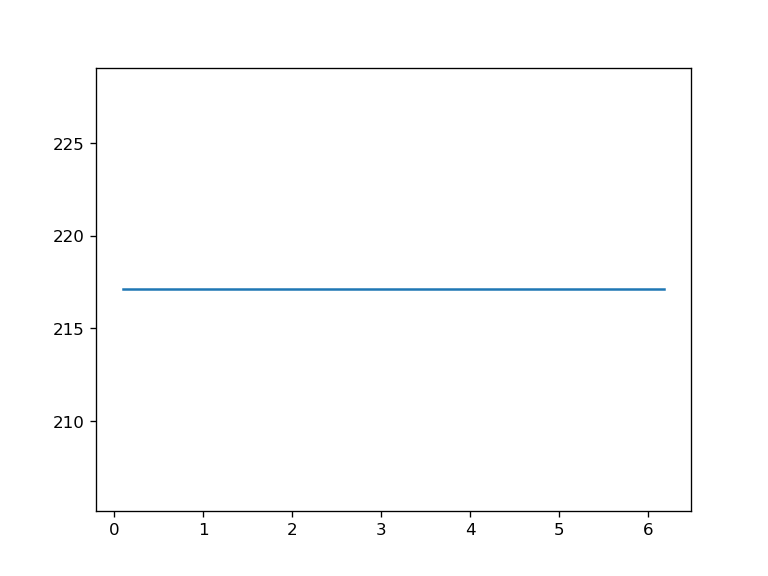

In [49]:
%matplotlib notebook
vals = []
theta_grid = np.linspace(0.1,np.pi*2-0.1,100)
for i in range(len(theta_grid)):
    tmp.thetas = np.array([theta_grid[i]-0.1, theta_grid[i]+0.3, theta_grid[i]+0.2, theta_grid[i]+0.1])
    val = tmp.NaHF_Hamiltonian()
    vals.append(val)
print(vals)
plt.plot(theta_grid, vals)